# 

### 1. Look at the big picture.
### 2. Get the data.
### 3. Discover and visualize the data to gain insights.
### 4. Prepare the data for Machine Learning algorithms.
### 5. Select a model and train it.
### 6. Fine-tune your model.
### 7. Present your solution.
### 8. Launch, monitor, and maintain your system.

In [1]:
# Configure access to Kaggle API credentials to be from .env

import os
from dotenv import load_dotenv

# Load variables from .env file
load_dotenv()

# Set Kaggle API credentials for the session
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

In [2]:
# Imports

# Dataset download
import shutil
from pathlib import Path
import zipfile
import kaggle

# Data processing & exploration
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import timeit



In [3]:
# Download the dataset

# Define project paths
PROJECT_DIR = Path(r"C:\Users\ohjin\OneDrive\문서\Python\HandsonML")
DATASET_NAME = "kanchana1990/texas-real-estate-trends-2024-500-listings"

# Change to project directory
os.makedirs(PROJECT_DIR, exist_ok=True)
os.chdir(PROJECT_DIR)

def fetch_and_extract_housing_data(project_dir=PROJECT_DIR, dataset_name=DATASET_NAME):
    # Download dataset from Kaggle
    print("Downloading dataset from Kaggle...")
    kaggle.api.dataset_download_files(dataset_name, path=project_dir, unzip=False)
    print("Download complete.")
    print("==================================================")

    # Find the zip file and extract
    zip_files = list(project_dir.glob("*.zip"))
    if not zip_files:
        raise FileNotFoundError("No zip files found in project directory after Kaggle download.")

    for zip_path in zip_files:
        print(f"Extracting {zip_path.name}...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(project_dir)
        # Optional: Clean up zip after extraction
        os.remove(zip_path)
        print(f"Extracted and removed {zip_path.name}")
    print("==================================================")

    # Verify CSV presence
    csv_files = list(project_dir.glob("*.csv"))
    if csv_files:
        print(f"CSV file(s) found: {[csv.name for csv in csv_files]}")
    else:
        raise FileNotFoundError("No CSV files found after extraction.")
    
    return csv_files[0]
    
csv_file = fetch_and_extract_housing_data()

Dataset URL: https://www.kaggle.com/datasets/kanchana1990/texas-real-estate-trends-2024-500-listings
Download complete.
Extracting texas-real-estate-trends-2024-500-listings.zip...
Extracted and removed texas-real-estate-trends-2024-500-listings.zip
CSV file(s) found: ['real_estate_texas_500_2024.csv']


In [19]:
# Load data
def load_housing_data(csv_file=csv_file): 
    return pd.read_csv(csv_file)

df = load_housing_data()

In [20]:
print(f'{df.shape[0]} rows x {df.shape[1]} columns')
df.head()

501 rows x 14 columns


,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0


In [39]:
# Drop NA values
df = df.dropna(subset=["sqft"])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 500
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   url              438 non-null    object  
 1   status           438 non-null    object  
 2   id               438 non-null    int64   
 3   listPrice        436 non-null    float64 
 4   baths            438 non-null    int64   
 5   baths_full       432 non-null    float64 
 6   baths_full_calc  432 non-null    float64 
 7   beds             434 non-null    float64 
 8   sqft             438 non-null    float64 
 9   stories          389 non-null    float64 
 10  sub_type         10 non-null     object  
 11  text             433 non-null    object  
 12  type             438 non-null    object  
 13  year_built       286 non-null    float64 
 14  sqft_cat         436 non-null    category
dtypes: category(1), float64(7), int64(2), object(5)
memory usage: 52.0+ KB


In [41]:
df.baths_full.value_counts()

baths_full
2.0    278
3.0     99
4.0     26
1.0     24
5.0      4
8.0      1
Name: count, dtype: int64

In [42]:
df.describe()

,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,year_built
count,4.380000e+02,4.360000e+02,438.000000,432.000000,432.000000,434.000000,438.000000,389.000000,286.000000
mean,9.128449e+09,4.632288e+05,2.636986,2.335648,2.335648,3.474654,2334.568493,1.375321,1999.559441
std,7.994131e+08,3.258627e+05,1.031851,0.762112,0.762112,0.889016,3220.244985,0.525639,25.310180
min,7.021680e+09,1.900000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1891.000000
25%,8.831153e+09,2.799000e+05,2.000000,2.000000,2.000000,3.000000,1604.250000,1.000000,1981.250000
50%,9.367015e+09,3.799695e+05,2.000000,2.000000,2.000000,3.000000,2034.500000,1.000000,2005.500000
75%,9.764096e+09,5.392500e+05,3.000000,3.000000,3.000000,4.000000,2636.500000,2.000000,2021.750000
max,9.992374e+09,2.875000e+06,8.000000,8.000000,8.000000,9.000000,67139.000000,4.000000,2024.000000


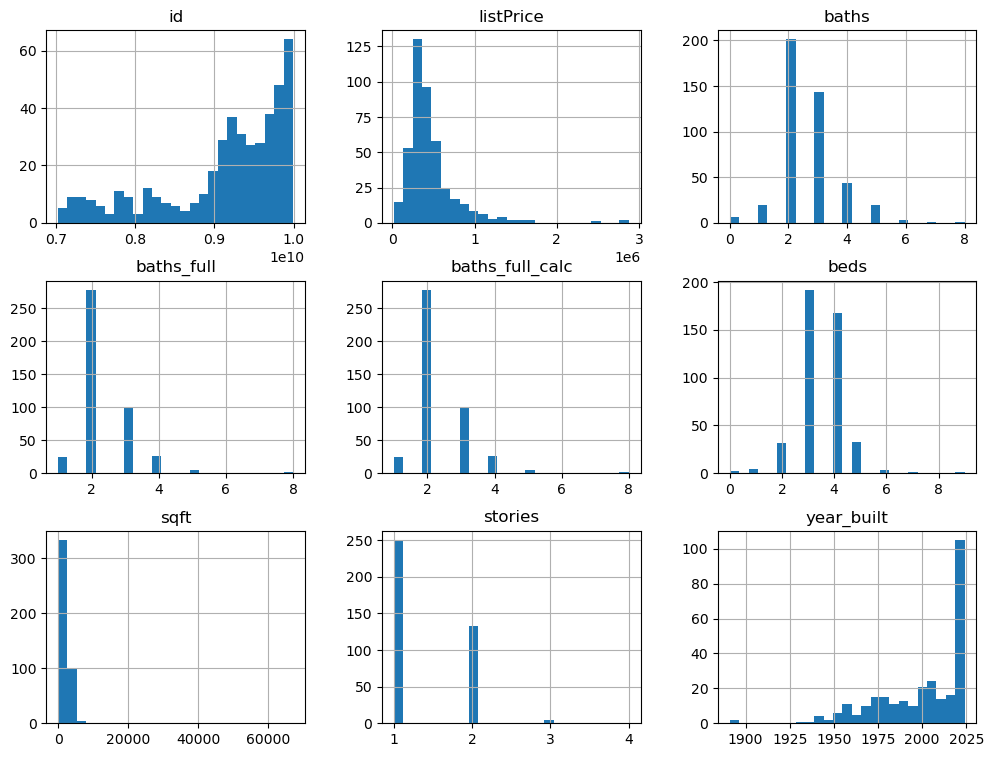

In [43]:
# Histogram
df.hist(bins=25, figsize=(12,9))
plt.show()

In [44]:
# Train test split
def split_train_test(data, test_ratio):
    np.random.seed(25)
    ind = np.random.permutation(len(data)) 
    test_size = int(len(data) * test_ratio) 
    test_ind = ind[:test_size] 
    train_ind = ind[test_size:] 
    return data.iloc[train_ind], data.iloc[test_ind]

train_df, test_df = split_train_test(df, 0.2) 
print(f"Train data set has {len(train_df)} rows, and test data set has {len(test_df)} rows.")

Train data set has 351 rows, and test data set has 87 rows.


In [45]:
# Benchmarking data set split times
def custom_split():
    train_df, test_df = split_train_test(df, 0.2)
    return train_df, test_df

def sklearn_split():
    train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=25)
    return train_df, test_df

custom_time = timeit.timeit(custom_split, number=100)
sklearn_time = timeit.timeit(sklearn_split, number=100)

print(f"Custom split time (100 runs): {custom_time:.4f} seconds")
print(f"Scikit-learn split time (100 runs): {sklearn_time:.4f} seconds")

Custom split time (100 runs): 0.0163 seconds
Scikit-learn split time (100 runs): 0.0449 seconds


#### * The custom split function is faster, but sklearn's train_test_split() supports a variety of inputs (NumPy arrays, Series, lists, sparse matrices)

Number of rows with NaN 'sqft': 0


<Axes: >

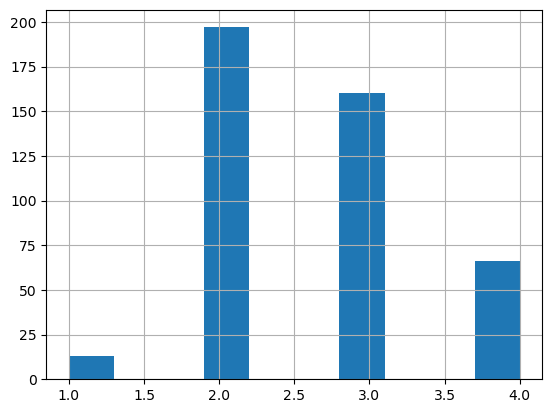

In [62]:
# Histogram of square footage categories

print(f"Number of rows with NaN 'sqft': {df['sqft'].isna().sum()}")
# df[df["sqft_cat"].isna()]             # displays those rows
df = df.dropna(subset=["sqft"])     # drop rows with NaN in 'sqft_cat'

df["sqft_cat"] = pd.cut(df["sqft"], 
                               bins=[0., 1000., 2000., 3000., np.inf], 
                               labels=[1, 2, 3, 4,])
df["sqft_cat"].hist()

In [63]:
# Check for rows with NaN for 'sqft_cat'

print(f"Number of rows with NaN 'sqft_cat': {df['sqft_cat'].isna().sum()}")
# df[df["sqft_cat"].isna()]             # displays those rows
df = df.dropna(subset=["sqft_cat"])     # drop rows with NaN in 'sqft_cat'

Number of rows with NaN 'sqft_cat': 0


In [65]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=25)

#for train_ind, test_ind in split.split(df, df["sqft_cat"]): 
#    strat_train = df.loc[train_ind] 
#    strat_test = df.loc[test_ind]

#strat_train.head()